# Comparison between INFORM and PCA

In [10]:
#import the packages

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [5]:
# import the data sets
df = pd.read_csv('Social_VUln_som_NEW.csv', delimiter = ';')
df_pca = pd.read_csv('vulnerability_cutter_2020_all_indi_varimax_try2_final.csv', decimal = ',')

## 01. Data Preprocessing

In [6]:
# append PCA data set to inform dataset
df['Vulnerability PCA'] = df_pca['vulnerability']

In [9]:
#standardize both methods

df_vuln = df[['Adm3', 'Vulnerability PCA', 'Vulnerability Hierachisch']]
df_vuln.select_dtypes(include='number').apply(stats.zscore)


,pca,Vulnerability Hierachisch
0,2.809512,1.755348
1,0.380814,1.646215
2,0.235728,0.974378
3,0.068780,0.256280
4,-2.501028,-1.627662
...,...,...
346,-0.080281,-0.509363
347,-0.577150,-1.221074
348,-0.106118,-1.237831
349,-0.932908,-0.408015


## 02. Calculate the mean squared error

In [5]:
  
# Given values
Y_true = list(df_vuln['Vulnerability Hierachisch']) 
  
# calculated values
Y_pred =list(df_vuln['Vulnerability PCA'])  # Y_pred = Y'
  
# Calculation of Mean Squared Error (MSE)
mean_squared_error(Y_true,Y_pred)

54.77287829861062

In [6]:
# Mean Squared Error
MSE = np.square(np.subtract(Y_true,Y_pred)).mean()

In [7]:
MSE

54.77287829861062

## 03. Determine the differences in ranking

In [8]:
df = df.sort_values(by =['Vulnerability Hierachisch'], ascending= False)
df['ranking_ahp'] =  np.arange(len(df))+1


df_pca = df_pca.sort_values(by =['vulnerability'], ascending= False)
df_pca['ranking_pca'] =  np.arange(len(df_pca))+1

df_vuln['ranking_pca'] = df_pca['ranking_pca']
df_vuln['ranking_ahp'] = df['ranking_ahp']

In [12]:
#determine for each community the difference in ranking with both the methods
df_vuln['difference ranking'] = np.abs(df_vuln['ranking_pca'] - df_vuln['ranking_ahp'])

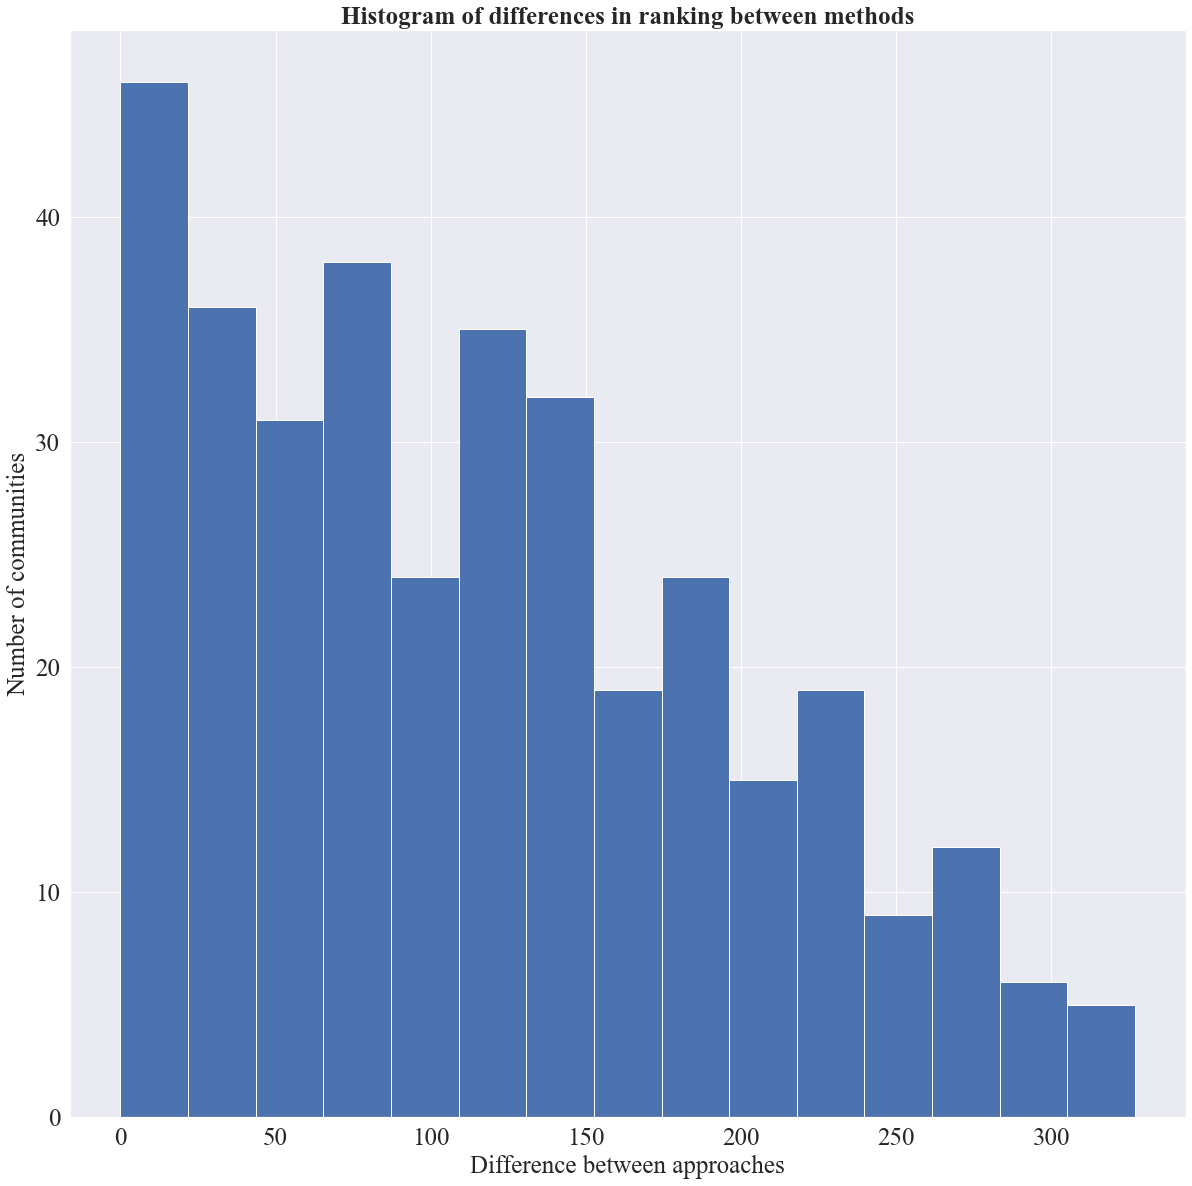

In [27]:
df_vuln['difference ranking'].hist(figsize = (20,20), bins = 15)
plt.title('Histogram of differences in ranking between methods',  fontsize = 25, fontname="Times New Roman", fontweight = 'bold')
plt.yticks(fontsize=25, fontname="Times New Roman")
plt.xticks(fontsize=25, fontname="Times New Roman")
plt.ylabel('Number of communities', fontsize = 25, fontname='Times New Roman')
plt.xlabel('Difference between approaches', fontsize = 25, fontname='Times New Roman')
plt.savefig('Differences_approaches.png')
plt.show();

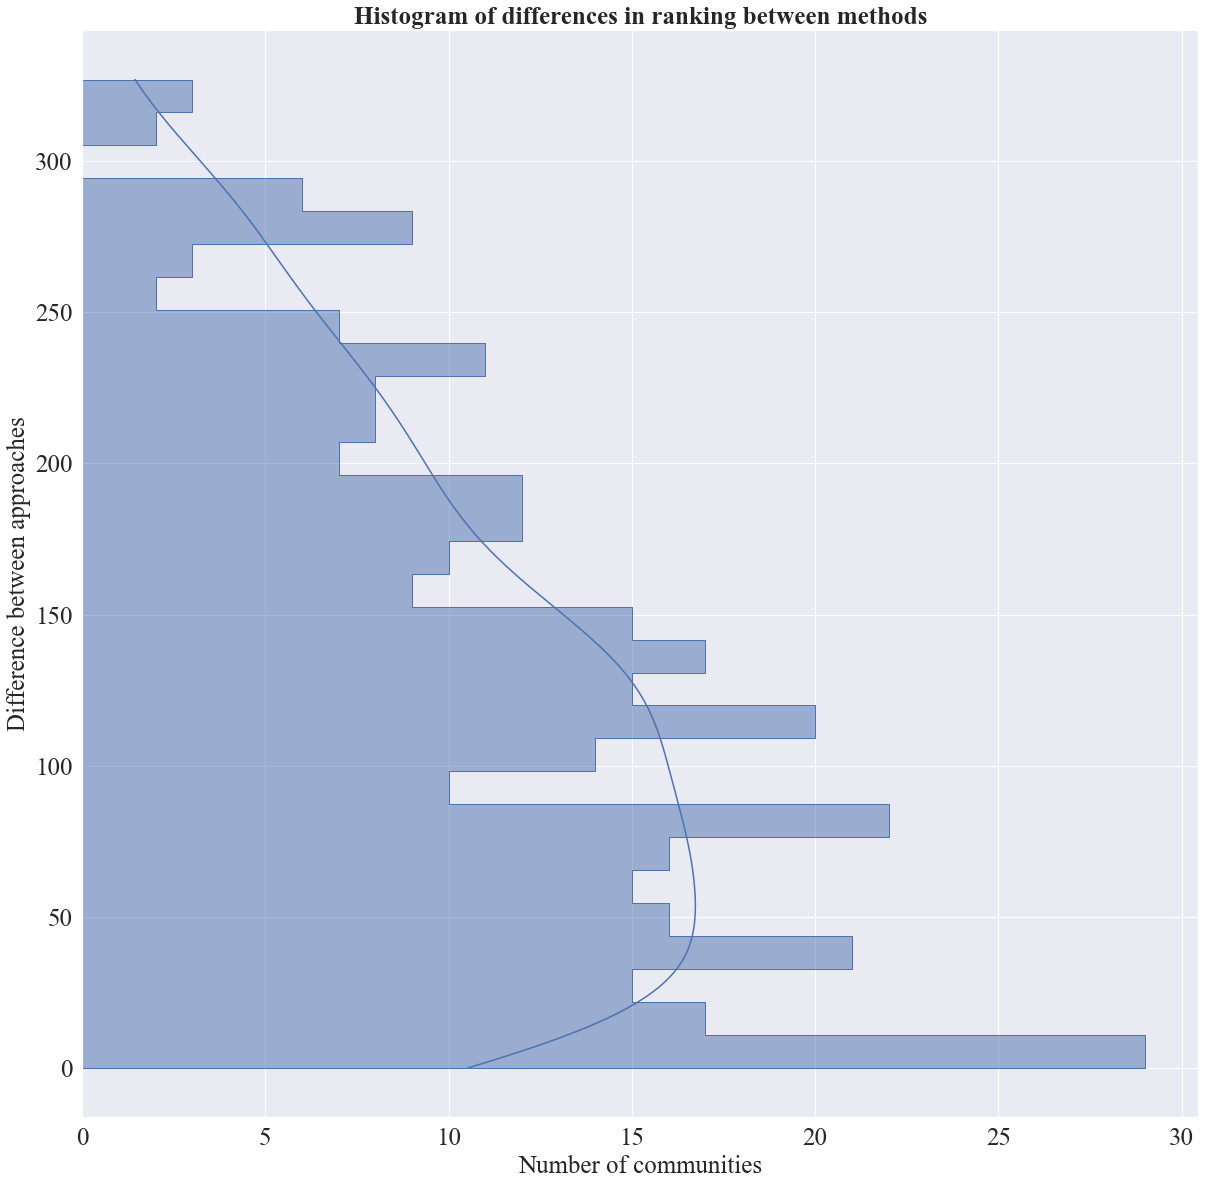

In [39]:

sns.set(rc={'figure.figsize':(20,20)})
sns.histplot(data=df_vuln, y="difference ranking", kde=True, element = 'step', bins = 30)
plt.title('Histogram of differences in ranking between methods',  fontsize = 25, fontname="Times New Roman", fontweight = 'bold')
plt.yticks(fontsize=25, fontname="Times New Roman")
plt.xticks(fontsize=25, fontname="Times New Roman")
plt.xlabel('Number of communities', fontsize = 25, fontname='Times New Roman')
plt.ylabel('Difference between approaches', fontsize = 25, fontname='Times New Roman')
plt.savefig('Differences_approaches.png')
plt.show();